In [2]:
import aplpy
import numpy as np
from astropy.cosmology import FlatLambdaCDM
from astropy import units as u
from astropy import constants as const
import numpy as np
import glob
import os
import sys
import matplotlib.pyplot as plt
from astropy.utils.data import get_pkg_data_filename
from math import log
import aplpy
from astropy.io import fits
from astropy.io.fits import getheader
from astropy.io.fits import Header
from astropy.wcs import WCS
from scipy.interpolate import interp1d
from scipy.optimize import curve_fit
np.warnings.filterwarnings('ignore')
from scipy.optimize import curve_fit
from astropy.coordinates import Distance
from astropy.cosmology import WMAP9 as cosmo

DA FARE:
   -optical contorni MKW8
    -contorno r500/2
    -mark the BCG
    -aumenta smooth gmrt
DOMANDE:
    -dove metto imm ottiche e xray
    -cosa in discussione e cos in risultati
    
16 arcmin



In [18]:
rms_jvla=6.5e-5
rms_gmrt=7.52e-4 
rms_lofar=8.6e-4

v_gmrt=325 #mhz
v_jvla=1500 #mhz
v_lofar=150 #mhza

x_b=2.5333e-5*10**6
x_c=1.8857e-5*10**6
x_d=3.72577e-5*10**6
x_all=rms_jvla
x_g=rms_gmrt*10**6
x_l=rms_lofar*10**6

In [19]:
#lev_jvla=np.dot([3, 4, 5, 6, 16, 32, 64,128],x_all)
lev=[1,2,4,8,16,32,64]
lev_jvla=np.dot(lev,3*x_all)
lev_b=np.dot(lev,3*x_b)
lev_c=np.dot(lev,3*x_c)
lev_d=np.dot(lev,3*x_d)
lev_gmrt=np.dot(lev,3*x_g)
lev_lofar=np.dot(lev,3*x_l)
lev_lofar_highres=np.dot(lev,3*378)
lev_gmrt_highres=np.dot(lev,3*250)
lev_wsclean=np.dot(lev,3*16)

In [20]:
cosmo = FlatLambdaCDM(H0=70, Om0=0.3)
z=0.027
Ez = cosmo.H(z).value/cosmo.H0.value
denscrit = (cosmo.critical_density(z))
dens_500=denscrit*500
M_500=0.735*10**(14)*const.M_sun*10**3*u.g /u.kg #from kg to g
R_500=((3*M_500)/(4*np.pi*dens_500))**(1/3)
R_500=(0.631*u.Mpc).to(u.kpc)
print('R_500',R_500)
D=Distance(z=0.027) #distance from z  #122.67 mpc from ned
print('cluster distance',D)
r_com=cosmo.comoving_distance(0.027)  
print('comoving distance',r_com)
d_A = cosmo.angular_diameter_distance(z=0.027)
theta = R_500/d_A

R_500 631.0 kpc
cluster distance 121.94642014890262 Mpc
comoving distance 114.92777701724295 Mpc


In [21]:
scale=cosmo.kpc_proper_per_arcmin(z)/60/u.arcsec*u.arcmin
Mpc=(1000./scale.value)/3600
kpc_100=(100./scale.value)/3600

In [22]:
kpc_100

0.0511997770139652

total flux 3 config , describe images, spectral index how i did that, why interesting
polarization

In [23]:
R_500_deg=R_500.value/scale.value/3600
R_500_deg

0.32307059295812046

In [2]:
D = aplpy.FITSFigure('./FITS/new_D_array_image.fixed.fits')
D.set_title('D configuration',size=18)
D.show_contour('./FITS/new_D_array_image.fixed.fits',colors='black', \
               smooth=1, levels=lev_d, alpha=0.2)

#D.show_contour('./FITS/MKW8_uvtaper_0_weight_briggs_robust_0._smooth_regrid.image.fits',colors='black', \
#               slices=[0,0],smooth=3, levels=lev_jvla, alpha=0.2)
D.add_scalebar(kpc_100, corner='bottom')
D.scalebar.set_label('100 kpc')
D.show_colorscale(vmin=4e-5*10**6,vmax=0.004*10**6,stretch='log',cmap='Oranges', smooth=1)
D.recenter(220.168,3.488, radius=0.05)
D.add_colorbar()
D.colorbar.set_font(size=14)
D.colorbar.set_axis_label_text('Surface brightness (\u03BCJy/Beam)')
D.colorbar.set_axis_label_font(size=18)
D.add_beam()
D.ticks.set_color('black')
D.tick_labels.set_xformat('hh:mm:ss')
D.tick_labels.set_yformat('dd:mm')
D.axis_labels.set_font(size=18)
D.tick_labels.set_font(size=18)
D.save('D-array_aplpyimage.png', dpi=144)

ValueError: When providing two arguments, the array must be of shape (N, 4)

<Figure size 720x648 with 0 Axes>

In [9]:
C = aplpy.FITSFigure('./FITS/new_C_array_image.fits',slices=[0,0])
C.set_title('C configuration',size=18)
#C.show_contour('./FITS/MKW8_uvtaper_0_weight_briggs_robust_0._smooth_regrid.image.fits',colors='black', \
#               slices=[0,0],smooth=1, levels=lev_jvla,alpha=0.2)
C.show_contour('./FITS/new_C_array_image.fits',colors='black', \
               slices=[0,0],smooth=1,  levels=lev_c,alpha=0.2)
C.add_scalebar(kpc_100, corner='bottom')
C.scalebar.set_label('100 kpc')
C.show_colorscale(vmin=5,vmax=0.002*10**6,stretch='log',cmap='Oranges', smooth=1)
C.recenter(220.168,3.488, radius=0.05)
C.add_colorbar()
C.colorbar.set_font(size=14)
C.colorbar.set_axis_label_text('Surface brightness (\u03BCJy/Beam)')
C.colorbar.set_axis_label_font(size=18)
C.add_beam()
C.ticks.set_color('black')
C.tick_labels.set_xformat('hh:mm:ss')
C.tick_labels.set_yformat('dd:mm')
C.axis_labels.set_font(size=18)
C.tick_labels.set_font(size=18)
C.save('C-array_aplpyimage.png',dpi=144)

ValueError: When providing two arguments, the array must be of shape (N, 4)

<Figure size 720x648 with 0 Axes>

In [12]:
#print(aplpy.__version)
C_big = aplpy.FITSFigure('./FITS/new_C_array_image.fits',slices=[0,0])
C_big.set_title('C configuration w/ peeling',size=18)
#C_big.show_contour('./FITS/MKW8_uvtaper_0_weight_briggs_robust_0._smooth_regrid.image.fits',colors='black', \
#                   slices=[0,0],smooth=1, levels=lev_jvla,alpha=0.1)
C_big.show_colorscale(vmin=1e-5*10**6,vmax=0.002*10**6,stretch='log',cmap='Oranges', smooth=1)
C_big.recenter(219.8139042,3.4564194, width=1.3,height=0.9)
#C_big.show_circles(220.159167,3.476389,ang_d, edgecolor='blue', linewidth=2,alpha=0.3)
C_big.add_scalebar(Mpc, corner='bottom')
C_big.scalebar.set_label('1 Mpc')
#C_big.show_arrows(220.1583-0.1,3.4764-0.1,0.1,0.1,width=0.01, color='k')
#C_big.add_label(220.168-0.15,3.488-0.15,'Pointing Center', size=12)
C_big.add_colorbar()
C_big.colorbar.set_font(size=14)
C_big.colorbar.set_axis_label_text('Surface brightness (\u03BCJy/Beam)')
C_big.colorbar.set_axis_label_font(size=18)
#C_big.colorbar.set_axis_label_pad(100)
#C_big.colorbar.set_ticks()
C_big.add_beam()
C_big.ticks.set_color('black')
C_big.tick_labels.set_xformat('hh:mm:ss')
C_big.tick_labels.set_yformat('dd:mm')
C_big.axis_labels.set_font(size=18)
C_big.tick_labels.set_font(size=18)
C_big.save('Cbig-array_aplpyimage.png',dpi=144)

ValueError: When providing two arguments, the array must be of shape (N, 4)

<Figure size 720x648 with 0 Axes>

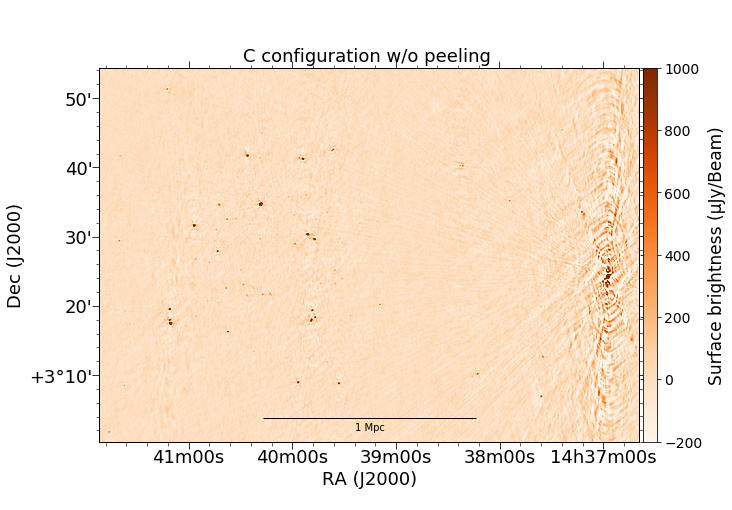

In [287]:
C_no_peel = aplpy.FITSFigure('./FITS/new_C_array_wo_peeling.fits',slices=[0,0])
C_no_peel.set_title('C configuration w/o peeling ',size=18)
#C_no_peel.show_contour('./FITS/MKW8_uvtaper_0_weight_briggs_robust_0._smooth_regrid.image.fits',colors='black', slices=[0,0],smooth=1, levels=[3*x],alpha=0.1)
C_no_peel.show_colorscale(vmin=-0.0002*10**6,vmax=0.001*10**6,stretch='linear',cmap='Oranges', smooth=1)
C_no_peel.recenter(219.8139042,3.4564194, width=1.3,height=0.9)
C_no_peel.add_scalebar(Mpc, corner='bottom')
C_no_peel.scalebar.set_label('1 Mpc')
#C_no_peel.show_arrows(220.1583-0.1,3.4764-0.1,0.1,0.1,width=0.01, color='k')
#C_no_peel.add_label(220.168-0.15,3.488-0.15,'Pointing Center', size=12)
C_no_peel.add_colorbar()
C_no_peel.colorbar.set_font(size=14)
C_no_peel.colorbar.set_axis_label_text('Surface brightness (\u03BCJy/Beam)')
C_no_peel.colorbar.set_axis_label_font(size=17)
C_no_peel.add_beam()
C_no_peel.ticks.set_color('black')
C_no_peel.tick_labels.set_xformat('hh:mm:ss')
C_no_peel.tick_labels.set_yformat('dd:mm')
C_no_peel.axis_labels.set_font(size=18)
C_no_peel.tick_labels.set_font(size=18)
#C_no_peel.save('C-array_WO_peeling_aplpyimage.png',dpi=144)

INFO: Setting slices=[0, 0] [aplpy.core]


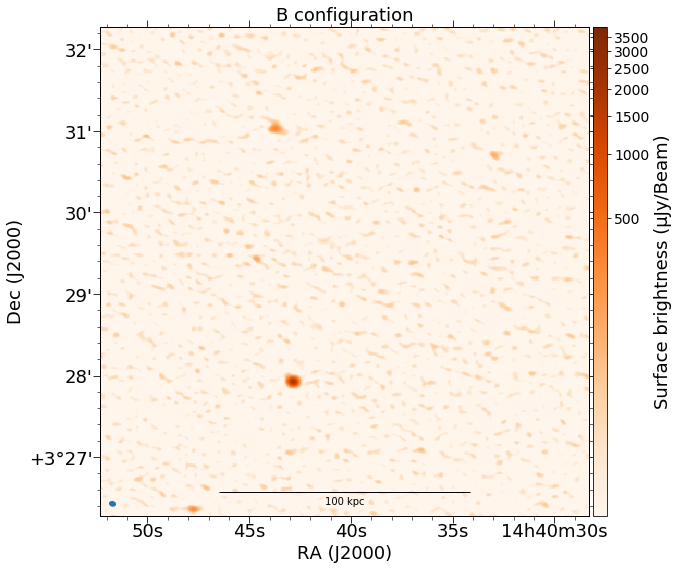

In [119]:
B = aplpy.FITSFigure('./FITS/new_B_array_image.fits',slices=[0,0])
B.set_title('B configuration',size=18)
#B.show_contour('./FITS/MKW8_uvtaper_0_weight_briggs_robust_0._smooth_regrid.image.fits',colors='black', \
#               slices=[0,0],smooth=1,levels=lev_b, alpha=0.2)

B.show_contour('./FITS/MKW8_uvtaper_0_weight_briggs_robust_0._smooth_regrid.image.fits',colors='black', \
              slices=[0,0],smooth=1,levels=lev_b, alpha=0.2)
#B.axis_labels.set_xtext('Right Ascension (J2000)')
#B.axis_labels.set_ytext('Declination (J2000)')
B.show_colorscale(vmin=2.06e-5*10**6,vmax=0.0039*10**6,stretch='log',cmap='Oranges', smooth=1,exponent=0.6)
B.recenter(220.168,3.488, radius=0.05)
B.add_scalebar(kpc_100, corner='bottom')
B.scalebar.set_label('100 kpc')
B.add_colorbar()
B.colorbar.set_font(size=14)
B.colorbar.set_axis_label_text('Surface brightness (\u03BCJy/Beam)')
B.colorbar.set_axis_label_font(size=18)
B.add_beam()
B.ticks.set_color('black')
B.tick_labels.set_xformat('hh:mm:ss')
B.tick_labels.set_yformat('dd:mm')
B.axis_labels.set_font(size=18)
B.tick_labels.set_font(size=18)
#B.save('B-array_aplpyimage.png',dpi=144)

In [1]:
B_C_D = aplpy.FITSFigure('./FITS/new_MKW8_uvtaper_0_weight_briggs_robust_0._smooth_regrid.image.fits',slices=[0,0])
B_C_D.set_title('JVLA',size=18)
B_C_D.show_contour('./FITS/MKW8_uvtaper_0_weight_briggs_robust_0._smooth_regrid.image.fits',colors='black', \
                   slices=[0,0],smooth=1, levels=lev_jvla, alpha=0.2)
B_C_D.show_colorscale(vmin=8e-5*10**6,vmax=0.05e-2*10**6,stretch='log',cmap='Oranges', smooth=1)
B_C_D.recenter(220.168,3.488, radius=0.05)
B_C_D.add_scalebar(kpc_100, corner='bottom')
B_C_D.scalebar.set_label('100 kpc')
B_C_D.add_colorbar()
B_C_D.colorbar.set_font(size=14)
B_C_D.colorbar.set_axis_label_text('Surface brightness (\u03BCJy/Beam)')
B_C_D.colorbar.set_axis_label_font(size=18)
B_C_D.add_beam()
B_C_D.ticks.set_color('black')
B_C_D.tick_labels.set_xformat('hh:mm:ss')
B_C_D.tick_labels.set_yformat('dd:mm')
B_C_D.axis_labels.set_font(size=18)
B_C_D.tick_labels.set_font(size=18)
B_C_D.save('B_C_D-array_aplpyimage.png', dpi=144)

NameError: name 'aplpy' is not defined

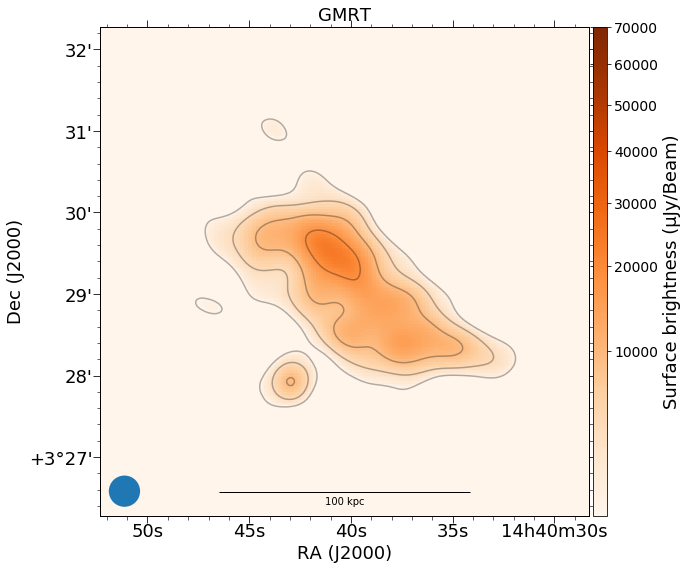

In [121]:
GMRT = aplpy.FITSFigure('FITS/new_MKW8_GMRT_smooth_regrid.fits',slices=[0,0])
GMRT.set_title('GMRT',size=18)
GMRT.show_contour('./FITS/new_MKW8_GMRT_smooth_regrid.fits',colors='black', slices=[0,0],smooth=1, \
                  levels=lev_gmrt,alpha=0.3)
GMRT.show_colorscale(vmin=0.00232513*10**6,vmax=0.07*10**6,stretch='sqrt',cmap='Oranges', smooth=1)
GMRT.recenter(220.168,3.488,radius=0.05)
GMRT.add_scalebar(kpc_100, corner='bottom')
GMRT.scalebar.set_label('100 kpc')
GMRT.add_colorbar()
GMRT.colorbar.set_font(size=14)
GMRT.colorbar.set_axis_label_text('Surface brightness (\u03BCJy/Beam)')
GMRT.colorbar.set_axis_label_font(size=18)
GMRT.ticks.set_color('black')
GMRT.tick_labels.set_xformat('hh:mm:ss')
GMRT.tick_labels.set_yformat('dd:mm')
GMRT.axis_labels.set_font(size=18)
GMRT.tick_labels.set_font(size=18)
#GMRT.ticks.set_xspacing(0.5)
GMRT.add_beam()
GMRT.save('GMRT.png',dpi=144)

In [20]:
GMRT = aplpy.FITSFigure('FITS/new_GMRT_highres.fits',slices=[0,0])
GMRT.set_title('GMRT - high resolution',size=18)
GMRT.show_contour('FITS/new_GMRT_highres.fits',colors='black', slices=[0,0],smooth=1, \
                  levels=lev_gmrt_highres,alpha=0.3)
GMRT.show_colorscale(vmin=444,vmax=8700,stretch='sqrt',cmap='Oranges', smooth=1)
GMRT.recenter(220.168,3.488,radius=0.05)
GMRT.add_scalebar(kpc_100, corner='bottom')
GMRT.scalebar.set_label('100 kpc')
GMRT.add_colorbar()
GMRT.colorbar.set_font(size=14)
GMRT.colorbar.set_axis_label_text('Surface brightness (\u03BCJy/Beam)')
GMRT.colorbar.set_axis_label_font(size=18)
GMRT.ticks.set_color('black')
GMRT.tick_labels.set_xformat('hh:mm:ss')
GMRT.tick_labels.set_yformat('dd:mm')
GMRT.axis_labels.set_font(size=18)
GMRT.tick_labels.set_font(size=18)
#GMRT.colorbar.set_width(50)
GMRT.add_beam()
GMRT.save('GMRT_highres.png',dpi=144)

ValueError: When providing two arguments, the array must be of shape (N, 4)

<Figure size 720x648 with 0 Axes>

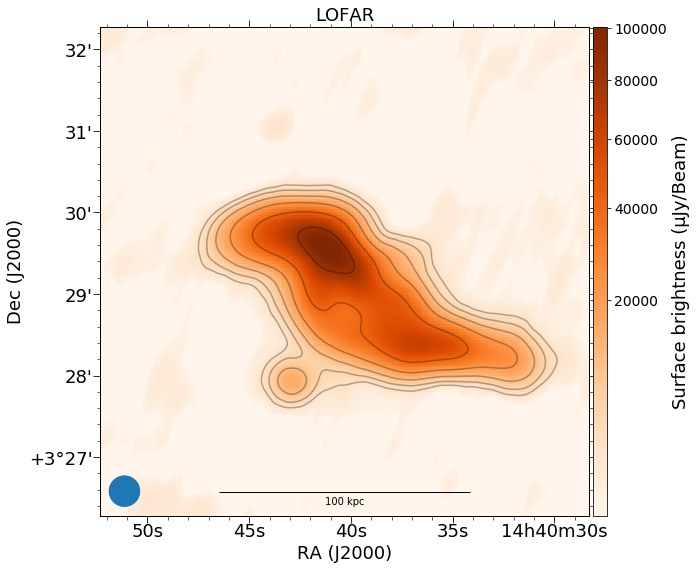

In [123]:
LOFAR = aplpy.FITSFigure('FITS/new_LOFAR_MKW8_smooth_regrid.fits',slices=[0,0])
LOFAR.set_title('LOFAR',size=18)
LOFAR.show_contour('./FITS/new_LOFAR_MKW8_smooth_regrid.fits',colors='black', slices=[0,0],smooth=1, \
                   levels=lev_lofar,alpha=0.3)
LOFAR.show_colorscale(vmin=0.000432513*10**6,vmax=0.100606*10**6,stretch='sqrt',cmap='Oranges', smooth=1)
LOFAR.recenter(220.168,3.488,radius=0.05)
LOFAR.add_scalebar(kpc_100, corner='bottom')
LOFAR.scalebar.set_label('100 kpc')
LOFAR.add_colorbar()
LOFAR.colorbar.set_font(size=14)
LOFAR.colorbar.set_axis_label_text('Surface brightness (\u03BCJy/Beam)')
LOFAR.colorbar.set_axis_label_font(size=18)
LOFAR.add_beam()
LOFAR.ticks.set_color('black')
LOFAR.tick_labels.set_xformat('hh:mm:ss')
LOFAR.tick_labels.set_yformat('dd:mm')
LOFAR.axis_labels.set_font(size=18)
LOFAR.tick_labels.set_font(size=18)
LOFAR.add_beam()
LOFAR.save('LOFAR.png',dpi=144)

In [29]:
LOFAR = aplpy.FITSFigure('FITS/new_LOFAR_highres.fits',slices=[0,0])
LOFAR.set_title('LOFAR - high resolution',size=18)
LOFAR.show_contour('./FITS/new_LOFAR_highres.fits',colors='black', slices=[0,0],smooth=1, \
                   levels=lev_lofar_highres,alpha=0.3)
LOFAR.show_colorscale(vmin=361,vmax=35000,stretch='sqrt',cmap='Oranges', smooth=1)
LOFAR.recenter(220.168,3.488,radius=0.05)
LOFAR.add_scalebar(kpc_100, corner='bottom')
LOFAR.scalebar.set_label('100 kpc')
LOFAR.add_colorbar()
LOFAR.colorbar.set_font(size=14)
LOFAR.colorbar.set_axis_label_text('Surface brightness (\u03BCJy/Beam)')
LOFAR.colorbar.set_axis_label_font(size=16)
LOFAR.add_beam()
LOFAR.ticks.set_color('black')
LOFAR.colorbar.set_axis_label_font(size=18)
LOFAR.tick_labels.set_xformat('hh:mm:ss')
LOFAR.tick_labels.set_yformat('dd:mm')
LOFAR.axis_labels.set_font(size=18)
LOFAR.tick_labels.set_font(size=18)
LOFAR.add_beam()
LOFAR.save('new_LOFAR_highres.png',dpi=144)

ValueError: When providing two arguments, the array must be of shape (N, 4)

<Figure size 720x648 with 0 Axes>

In [3]:
B_C_D = aplpy.FITSFigure('./FITS/new_high_res_image.fits',slices=[0,0])
B_C_D.set_title('JVLA - high resolution',size=18)
#B_C_D.show_contour('./MKw8_im-MFS-image.fits',colors='black', \
#                   slices=[0,0],smooth=1, levels=lev_wsclean, alpha=0.2)
B_C_D.show_colorscale(vmin=5,vmax=100,stretch='log',cmap='Oranges', smooth=1)
#B_C_D.recenter(220.168,3.488, radius=0.05)
#B_C_D.add_scalebar(kpc_100, corner='bottom')
#B_C_D.scalebar.set_label('100 kpc')
B_C_D.add_colorbar()
B_C_D.colorbar.set_font(size=14)
B_C_D.colorbar.set_axis_label_text('Surface brightness (\u03BCJy/Beam)')
B_C_D.colorbar.set_axis_label_font(size=18)
#B_C_D.add_beam()
B_C_D.ticks.set_color('black')
B_C_D.tick_labels.set_xformat('hh:mm:ss')
B_C_D.tick_labels.set_yformat('dd:mm')
B_C_D.axis_labels.set_font(size=18)
B_C_D.tick_labels.set_font(size=18)
B_C_D.save('new_wsclean_highres.png')

ValueError: When providing two arguments, the array must be of shape (N, 4)

<Figure size 720x648 with 0 Axes>

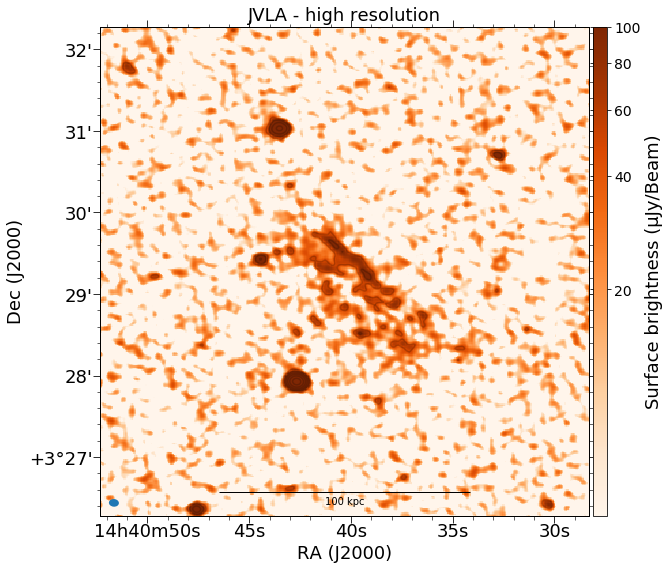

In [125]:
B_C_D = aplpy.FITSFigure('./FITS/new_wsclean_highres.fits',slices=[0,0])
B_C_D.set_title('JVLA - high resolution',size=18)
B_C_D.show_contour('./FITS/new_wsclean_highres.fits',colors='black', \
                   slices=[0,0],smooth=1, levels=lev_wsclean, alpha=0.2)
B_C_D.show_colorscale(vmin=5,vmax=100,stretch='log',cmap='Oranges', smooth=1)
B_C_D.recenter(220.168,3.488, radius=0.05)
B_C_D.add_scalebar(kpc_100, corner='bottom')
B_C_D.scalebar.set_label('100 kpc')
B_C_D.add_colorbar()
B_C_D.colorbar.set_font(size=14)
B_C_D.colorbar.set_axis_label_text('Surface brightness (\u03BCJy/Beam)')
B_C_D.colorbar.set_axis_label_font(size=18)
B_C_D.add_beam()
B_C_D.ticks.set_color('black')
B_C_D.tick_labels.set_xformat('hh:mm:ss')
B_C_D.tick_labels.set_yformat('dd:mm')
B_C_D.axis_labels.set_font(size=18)
B_C_D.tick_labels.set_font(size=18)
B_C_D.save('new_wsclean_highres.png')

### SPECTRAL INDEX ###

In [33]:
#check
gmrt  = fits.open('./FITS/MKW8_GMRT_smooth_regrid.fits')
lofar = fits.open('./FITS/LOFAR_MKW8_smooth_regrid.fits')
jvla = fits.open('./FITS/MKW8_uvtaper_0_weight_briggs_robust_0._smooth_regrid.image.fits')

hdu_gmrt  = gmrt[0]
hdu_jvla = jvla[0]
hdu_lofar = lofar[0]

bmaj_gmrt = hdu_gmrt.header['BMAJ'] * 3600.
bmin_gmrt = hdu_gmrt.header['BMIN'] * 3600.

bmaj_jvla = hdu_jvla.header['BMAJ'] * 3600.
bmin_jvla = hdu_jvla.header['BMIN'] * 3600.

bmaj_lofar = hdu_lofar.header['BMAJ'] * 3600.
bmin_lofar = hdu_lofar.header['BMIN'] * 3600.

print ("----------------")
print ("beam gmrt :", bmaj_gmrt, bmin_gmrt)
print ("beam jvla:", bmaj_jvla, bmin_jvla)
print ("beam jvla:", bmaj_lofar, bmin_lofar)
print ("----------------")


----------------
beam gmrt : 22.9999999985316 22.9999999807008
beam jvla: 22.9999999929732 22.9999998890664
beam jvla: 23.000000001523198 23.000000001246
----------------


In [34]:
gmrt_data = gmrt[0].data
jvla_data= jvla[0].data
lofar_data= lofar[0].data

gmrt_im=gmrt_data[0][0]
jvla_im=jvla_data[0][0]
lofar_im=lofar_data[0][0]

r=2048

#crop images
def crop_im (image, r=r):
    c=int(len(image)/2)
    new_image=image[(c-r):(c+r),(c-r):(c+r)]
    return new_image

new_jvla_im=crop_im(jvla_im)
new_gmrt_im=crop_im(gmrt_im)
new_lofar_im=crop_im(lofar_im)

print ('JVLA image: old shape ', jvla_im.shape, 'new shape ',new_jvla_im.shape)
print ('gmrt image: old shape ', gmrt_im.shape, 'new shape ',new_gmrt_im.shape)
print ('LOFAR image: old shape ', lofar_im.shape, 'new shape ',new_lofar_im.shape)

JVLA image: old shape  (4096, 4096) new shape  (4096, 4096)
gmrt image: old shape  (4096, 4096) new shape  (4096, 4096)
LOFAR image: old shape  (4096, 4096) new shape  (4096, 4096)


In [35]:
S_gmrt=np.zeros((r*2,r*2))
S_jvla=np.zeros((r*2,r*2))
S_lofar=np.zeros((r*2,r*2))  


In [36]:
def analytical_fit(v_1,v_2,S_1, S_2):
    v_cost=log(v_1/v_2)
    S=log(S_1/S_2)
    alpha=(S/v_cost)
    return alpha

In [37]:
def error_analytical(S_1, S_2, rms_1,rms_2, v_1, v_2, f_1, f_2):
    
    delta_s_1=np.sqrt(pow(f_1*S_1,2)+pow(rms_1,2))

    delta_s_2=np.sqrt(pow(f_2*S_2,2)+pow(rms_2,2))

    delta_alpha=(abs(1/log(v_1/v_2)))*np.sqrt(pow(delta_s_1/S_1,2)+pow(delta_s_2/S_2,2))
    
    return delta_alpha

In [38]:
def check_sigma(flux,rms,n):
    if flux>(n*rms):
        return flux    
    else:
        return np.nan

In [39]:
def MC_error (S_gmrt, S_jvla, S_lofar, n_iter=1000):
    
    alpha_simulated=[]
    for n in range(n_iter):
        gmrt_simulation=np.random.normal(S_gmrt,rms_gmrt)
        jvla_simulation=np.random.normal(S_jvla,rms_jvla) 
        new_simulation=np.random.normal(S_lofar,rms_lofar) 
        if gmrt_simulation>0 and  jvla_simulation>0 and new_simulation>0:
            alpha_simulated.append(linear_fit(v_gmrt, v_jvla, v_lofar, gmrt_simulation, jvla_simulation, new_simulation))
    error=np.std(alpha_simulated)
    return error


### Integrated flux and Beam data

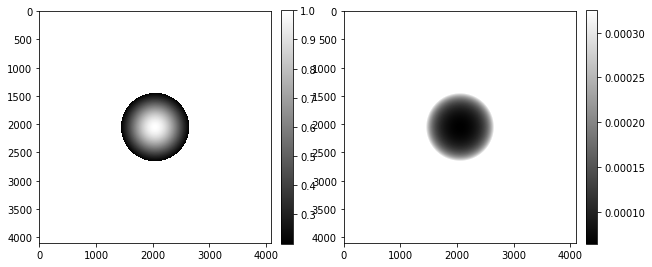

In [40]:
#load data
beam_jvla = fits.open('./FITS/MKW8_BEAM_uvtaper_0_weight_briggs_robust_0_regrid.fits')
beam_jvla_data= beam_jvla[0].data
beam_jvla_im=beam_jvla_data[0][0]
beam_jvla_im=crop_im(beam_jvla_im)
rms_jvla_array=np.full((r*2, r*2), rms_jvla)

#rms l band
rms_jvla_map=rms_jvla_array/beam_jvla_im
fig= plt.figure(figsize=[10,10])

ax1 = fig.add_subplot(121)
im = ax1.imshow(beam_jvla_im, cmap='gray')
fig.colorbar(im, fraction=0.046, pad=0.04)
#ax1.set_ylabel(fontsize = 16)
#ax1.set_xlabel(fontsize = 16)


ax2 = fig.add_subplot(122)
im=ax2.imshow(rms_jvla_map, cmap='gray')
fig.colorbar(im,fraction=0.046, pad=0.04)

rms_jvla_map[np.isnan(rms_jvla_map)==True] =rms_jvla

fig.savefig('PB.png')


#plt.colorbar()
#fig.colorbar(beam_jvla_im)

In [43]:
S_total_jvla=4.77e-3 
S_total_gmrt= 2.61e-01
S_total_lofar=1.125

integrated_alpha_jvla_gmrt=(np.log(S_total_gmrt)-np.log(S_total_jvla))/(np.log(v_gmrt)-np.log(v_jvla))
integrated_alpha_lofar_gmrt=(np.log(S_total_gmrt)-np.log(S_total_lofar))/(np.log(v_gmrt)-np.log(v_lofar))
integrated_alpha_lofar_jvla=(np.log(S_total_jvla)-np.log(S_total_lofar))/(np.log(v_jvla)-np.log(v_lofar))

Beam_Area_jvla=149.851
Beam_Area_gmrt=149.851
Beam_Area_lofar=149.851

N_p_gmrt=6841
N_p_jvla=6842
N_p_lofar=6841

S=[S_total_lofar,S_total_gmrt, S_total_jvla]
v=[v_lofar, v_gmrt,v_jvla]

'''
per calcolare flusso integrato faccio tra:
LOFAR-GMRT
GMRT-VLA
LOFAR-VLA
'''
N_beam_jvla=N_p_jvla/Beam_Area_jvla
N_beam_gmrt=N_p_gmrt/Beam_Area_gmrt
N_beam_lofar=N_p_lofar/Beam_Area_lofar

delta_s_gmrt_integrated=np.sqrt(pow(0.08*S_total_gmrt,2)+pow(rms_gmrt,2)*N_beam_gmrt) 
delta_s_jvla_integrated=np.sqrt(pow(0.03*S_total_jvla,2)+pow(rms_jvla,2)*N_beam_jvla)
delta_s_lofar_integrated=np.sqrt(pow(0.15*S_total_lofar,2)+pow(rms_lofar,2)*N_beam_lofar)

delta_alpha_integrated_jvla_gmrt=(abs(1/log(v_gmrt/v_jvla)))*np.sqrt(pow(delta_s_gmrt_integrated/S_total_gmrt,2) \
                                                           +pow(delta_s_jvla_integrated/S_total_jvla,2))
delta_alpha_integrated_lofar_gmrt=(abs(1/log(v_gmrt/v_lofar)))*np.sqrt(pow(delta_s_gmrt_integrated/S_total_gmrt,2) \
                                                           +pow(delta_s_lofar_integrated/S_total_lofar,2))
delta_alpha_integrated_lofar_jvla=(abs(1/log(v_jvla/v_lofar)))*np.sqrt(pow(delta_s_jvla_integrated/S_total_jvla,2) \
                                                           +pow(delta_s_lofar_integrated/S_total_lofar,2))

err=[delta_alpha_integrated_jvla_gmrt,delta_alpha_integrated_lofar_gmrt,delta_alpha_integrated_lofar_jvla]

print('*** integrated spectral index ***')
print('jvla-gmrt: ', round(integrated_alpha_jvla_gmrt,2) ,'error: ',round(delta_alpha_integrated_jvla_gmrt,2))
print('lofar-gmrt: ', round(integrated_alpha_lofar_gmrt,2),'error: ',round(delta_alpha_integrated_lofar_gmrt,2))
print('lofar-jvla: ', round(integrated_alpha_lofar_jvla,2), 'error: ',round(delta_alpha_integrated_lofar_jvla,2))
print('mean: ', round((integrated_alpha_jvla_gmrt+integrated_alpha_lofar_gmrt+ \
                       integrated_alpha_lofar_jvla)/3,2),'error',round(np.std(err)/np.sqrt(3),2))
#print('error:', round(delta_alpha_integrated,2))


*** integrated spectral index ***
jvla-gmrt:  -2.62 error:  0.08
lofar-gmrt:  -1.89 error:  0.22
lofar-jvla:  -2.37 error:  0.08
mean:  -2.29 error 0.04


In [44]:
def lin_curve_fit(x,y,err):
    
    def func(x,a,b):

        return np.dot(a,x)+b



    coeffs, matcov = curve_fit(func, x, y, sigma=err)
    yaj = func(x, *coeffs)
    
    fin_err=np.sqrt(np.diag(matcov))[0]
 
    return coeffs,yaj,fin_err

In [45]:
def lin_curve_fit_no_err(x,y):
    
    def func(x,a,b):

        return np.dot(a,x)+b



    coeffs, matcov = curve_fit(func, x, y)
    yaj = func(x, *coeffs)
    
    return coeffs[0]

In [46]:
def linear_fit( v_1, v_2, v_3, S_1, S_2,S_3):
    v_log=(log(v_1),log(v_2),log(v_3))  
    S_log=(log(S_1),log(S_2),log(S_3))
    A = np.vstack([v_log, np.ones(len(S_log))]).T
    alpha, _ = np.linalg.lstsq(A, S_log, rcond=None)[0]
    
    return alpha

In [47]:
jp_path='./s_jpfull_0.6_.fits'
kg_path='./s_kgjpfull_0.6_.fits'
jp_hdu = fits.open(jp_path)
kg_hdu=fits.open(kg_path)

jp=jp_hdu[0].data
kg=kg_hdu[0].data


[-2.36691168  5.22846812] 0.14882359499705342


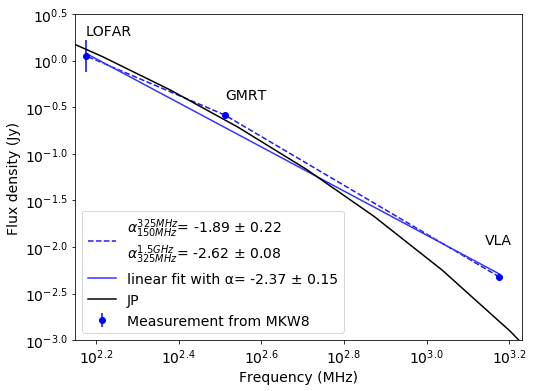

In [48]:
S=[S_total_jvla,S_total_gmrt,S_total_lofar]
v=[v_jvla,v_gmrt,v_lofar]
error=[delta_s_jvla_integrated,delta_s_gmrt_integrated,delta_s_lofar_integrated]


S = np.asarray(S, dtype=float)
v = np.asarray(v, dtype=float)
e = np.asarray(error, dtype=float)

x = np.log10(v)
y = np.log10(S)
loge = S/(e*np.log(10.))

coeff,yaj,fin_err=lin_curve_fit(x,y,loge)

print(coeff,fin_err)
words=['LOFAR','GMRT','VLA'] 
plt.figure(figsize=(8,6))
plt.errorbar(x, y, yerr=e, fmt='o',color='b', ecolor='b', label='Measurement from MKW8')
plt.plot(x[0:2],y[0:2],'--',color='b',label='$\u03B1_{150 MHz}^{325 MHz}$= %.2f \u00B1 %.2f \n$\u03B1_{325 MHz}^{1.5 GHz}$= %.2f \u00B1 %.2f' \
         %(integrated_alpha_lofar_gmrt, delta_alpha_integrated_lofar_gmrt, \
           integrated_alpha_jvla_gmrt,delta_alpha_integrated_jvla_gmrt), alpha=0.9)
plt.plot(x[1:3],y[1:3],'--',color='b',alpha=0.9)
plt.plot((x[0],x[2]),(yaj[0],yaj[2]),'--',color='white')

plt.plot(x,yaj,color='b',alpha=0.8, label='linear fit with \u03B1= %.2f \u00B1 %.2f' %(coeff[0], fin_err))

plt.plot(np.log(jp[0])-log(pow(10,9.895)),np.log(jp[1])-0.725,'-', color='k', label='JP')
#plt.plot(np.log(kg[0])-log(pow(10,8)),np.log(kg[1])-log(pow(10,7.55)),':', color='k', label='KG')
plt.text(x[0]-0.035,yaj[0]+0.32,'VLA',fontsize=14)
plt.text(x[1],yaj[1]+0.3,'GMRT',fontsize=14)
plt.text(x[-1],yaj[-1]+0.2,'LOFAR',fontsize=14)
#plt.yscale('log')
#plt.xscale('log')
plt.xlabel('Frequency (MHz)',fontsize=14)
plt.ylabel('Flux density (Jy)', fontsize=14)
plt.xlim(2.15,3.23)
plt.ylim(-3,0.5)
plt.legend(loc='lower left',prop={'size': 14})
plt.savefig('fit.png')

positions_x=np.arange(2.2,3.4,0.2)
labels_x=[]
for i in positions_x:
    labels_x.append('$10^{'+str(round(i,1))+'}$')
plt.xticks(positions_x, labels_x, size=14)

labels_y=[]
positions_y=np.arange(-3.,1.,0.5)
for j in positions_y:
    labels_y.append('$10^{'+str(round(j,1))+'}$')
plt.yticks(positions_y, labels_y, size=14)
plt.savefig('fit.png')
plt.show()

[-2.36691168  5.22846812] 0.14882359499705342


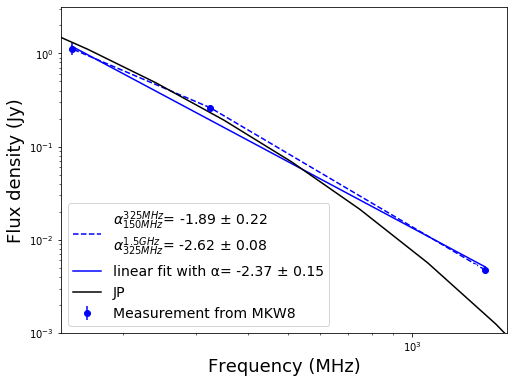

In [49]:
S=[S_total_jvla,S_total_gmrt,S_total_lofar]
v=[v_jvla,v_gmrt,v_lofar]
error=[delta_s_jvla_integrated,delta_s_gmrt_integrated,delta_s_lofar_integrated]


S = np.asarray(S, dtype=float)
v = np.asarray(v, dtype=float)
e = np.asarray(error, dtype=float)

x = np.log10(v)
y = np.log10(S)
loge = S/(e*np.log(10.))

coeff,yaj,fin_err=lin_curve_fit(x,y,loge)

print(coeff,fin_err)
words=['LOFAR','GMRT','VLA'] 
plt.figure(figsize=(8,6))
plt.errorbar(v, S, yerr=e, fmt='o',color='b', ecolor='b', label='Measurement from MKW8')
plt.plot(v[0:2],S[0:2],'--',color='b',label='$\u03B1_{150 MHz}^{325 MHz}$= %.2f \u00B1 %.2f \n$\u03B1_{325 MHz}^{1.5 GHz}$= %.2f \u00B1 %.2f' \
    %(integrated_alpha_lofar_gmrt, delta_alpha_integrated_lofar_gmrt, \
           integrated_alpha_jvla_gmrt,delta_alpha_integrated_jvla_gmrt), alpha=1)
plt.plot(v[1:3],S[1:3],'--',color='b',alpha=1)
plt.plot((v[0],S[2]),(10**yaj[0],10**yaj[2]),'--',color='white')

plt.plot(10**x,10**yaj,color='b',alpha=1, label='linear fit with \u03B1= %.2f \u00B1 %.2f' %(coeff[0], fin_err))

plt.plot(10**(np.log(jp[0])-log(pow(10,9.895))),10**(np.log(jp[1])-0.725),'-', color='k', label='JP')
#plt.plot(np.log(kg[0])-log(pow(10,8)),np.log(kg[1])-log(pow(10,7.55)),':', color='k', label='KG')
#plt.text(10v[0]-0.04,yaj[0]+0.32,'VLA',fontsize=14)
#plt.text([v[1],yaj[1]+0.3,'GMRT',fontsize=14)
#plt.text(v[-1],yaj[-1]+10*0.2,'LOFAR',fontsize=14)
plt.yscale('log')
plt.xscale('log')
plt.xlabel('Frequency (MHz)',fontsize=18)
plt.ylabel('Flux density (Jy)', fontsize=18)
plt.xlim(10**2.15,10**3.23)
plt.ylim(10**(-3),10**0.5)
plt.legend(loc='lower left',prop={'size': 14})
plt.savefig('fit.png')
'''

positions_x=np.arange(2.2,3.4,0.2)
labels_x=[]
for i in positions_x:
    labels_x.append('$10^{'+str(round(i,1))+'}$')
plt.xticks(positions_x, labels_x, size=14)

labels_y=[]
positions_y=np.arange(-3.,1.,0.5)
for j in positions_y:
    labels_y.append('$10^{'+str(round(j,1))+'}$')
plt.yticks(positions_y, labels_y, size=14)
'''
plt.savefig('fit.png',DPI=144)
plt.show()

In [50]:
def spectral_index_2_freq(comb, im_1, im_2):
    
    S_1=np.zeros((r*2,r*2))  
    S_2=np.zeros((r*2,r*2)) 
    
    if comb=='GJ' or comb=='JG':
        f_1=0.08 #gmrt
        f_2=0.03 #jvla
        
        rms_1=4e-4
        #rms_2=5.75e-5
        rms_2=rms_jvla_map
        
        n_sigma= 3
        
        v_1=v_gmrt
        v_2=v_jvla
 
    elif comb=='GL' or comb=='LG':
        f_1=0.08 #gmrt
        f_2=0.15 #lofar
        
        rms_1=4e-4
        rms_2=3.555e-4
        
        n_sigma=5
        
        v_1=v_gmrt
        v_2=v_lofar
        
    elif comb=='LJ' or comb=='JL':
        f_1=0.15 #l0far
        f_2=0.03 #jvla
        
        rms_1=3.555e-4
        #rms_2=5.75e-5
        rms_2=rms_jvla_map
        
        n_sigma=3
    
        v_1=v_lofar
        v_2=v_jvla
        
        
    alpha=np.empty((r*2,r*2))
    error=np.empty((r*2,r*2))
    alpha[:] = np.nan
    error[:] = np.nan

    im_1[im_1<=0] = np.nan
    im_2[im_2<=0] = np.nan


    for j in range(len(im_1)):
        for i in range(len(im_1)):  

                S_1[j][i]=check_sigma(im_1[j][i],rms_1,n_sigma)
                
                if np.isscalar(rms_2):
                    rms_2_ji=rms_2
                else:
                    rms_2_ji=rms_2[j][i]
                    
                S_2[j][i]=check_sigma(im_2[j][i],rms_2_ji,n_sigma)

                if S_jvla[j][i]>0. and S_lofar[j][i]>0.:

                    alpha[j][i]=analytical_fit(v_1, v_2, S_1[j][i], S_2[j][i])
                    error[j][i]=error_analytical(S_1[j][i], S_2[j][i], rms_1,rms_2_ji,\
                                           v_1, v_2, f_1, f_2)        
                    
    return alpha,error


In [51]:
def spectral_index_3_freq():
    
    f_gmrt=0.08
    f_jvla=0.03
    f_lofar=0.15
    
    #data
    rms_jvla=rms_jvla_map
    rms_gmrt=4e-4
    rms_lofar=3.555e-4
    
    alpha=np.empty((r*2,r*2))
    error=np.empty((r*2,r*2))
    
    alpha[:] = np.nan
    error[:] = np.nan

    new_jvla_im[new_jvla_im<=0] = np.nan
    new_gmrt_im[new_gmrt_im<=0] = np.nan
    new_lofar_im[new_lofar_im<=0] = np.nan
    
    for j in range(len(new_jvla_im)):
        for i in range(len(new_jvla_im)):  

            S_jvla[j][i]=check_sigma(new_jvla_im[j][i],rms_jvla[j][i],3)
            S_gmrt[j][i]=check_sigma(new_gmrt_im[j][i],rms_gmrt,3)
            S_lofar[j][i]=check_sigma(new_lofar_im[j][i],rms_lofar,3)

            if np.isnan(S_jvla[j][i])== False and np.isnan(S_gmrt[j][i])== False and np.isnan(S_lofar[j][i])== False:
                
                v_log=(np.log(v_gmrt),np.log(v_jvla),np.log(v_lofar))  
                S_log=(np.log(S_gmrt[j][i]), np.log(S_jvla[j][i]), np.log(S_lofar[j][i]))
                
                alpha[j][i]=lin_curve_fit_no_err(v_log, S_log)
                error[j][i]=MC_error(S_gmrt[j][i], S_jvla[j][i], S_lofar[j][i])
                         
    return alpha,error

### 3 frequencies

In [52]:
alpha,error=spectral_index_3_freq()
fits.writeto('alpha_all.fits', alpha, gmrt[0].header, overwrite=True)
fits.writeto('error_all.fits', error, gmrt[0].header, overwrite=True)

In [53]:
all_freq = aplpy.FITSFigure('alpha_all.fits',slices=[0,0])
all_freq.set_title('JVLA-GMRT-LOFAR', size=18)
#LOFAR.show_contour('./FITS/new_LOFAR_MKW8_smooth_regrid.fits',colors='black', slices=[0,0],smooth=1, levels=[5*x_lofar*10**6,10*x_lofar*10**6],alpha=0.5)
all_freq.show_contour('./FITS/MKW8_uvtaper_0_weight_briggs_robust_0._smooth_regrid.image.fits',colors='black', \
                      slices=[0,0],smooth=1, levels=lev_jvla, alpha=0.3)
all_freq.show_colorscale(vmin=-3,vmax=-0.1,stretch='linear',cmap='rainbow', smooth=1)
all_freq.recenter(220.168,3.488, radius=0.04)
all_freq.add_colorbar()
all_freq.colorbar.set_axis_label_text('Spectral index')
all_freq.colorbar.set_axis_label_font( size=17)
all_freq.colorbar.set_font(size=14)
all_freq.add_beam()
all_freq.ticks.set_color('black')
all_freq.tick_labels.set_xformat('hh:mm:ss')
all_freq.tick_labels.set_yformat('dd:mm')
all_freq.axis_labels.set_font(size=18)
all_freq.tick_labels.set_font(size=18)
all_freq.save('spectral_index_all.png',dpi=144)

ValueError: When providing two arguments, the array must be of shape (N, 4)

<Figure size 720x648 with 0 Axes>

INFO: Auto-setting vmax to  3.790e-01 [aplpy.core]
INFO: Setting slices=[0, 0] [aplpy.core]


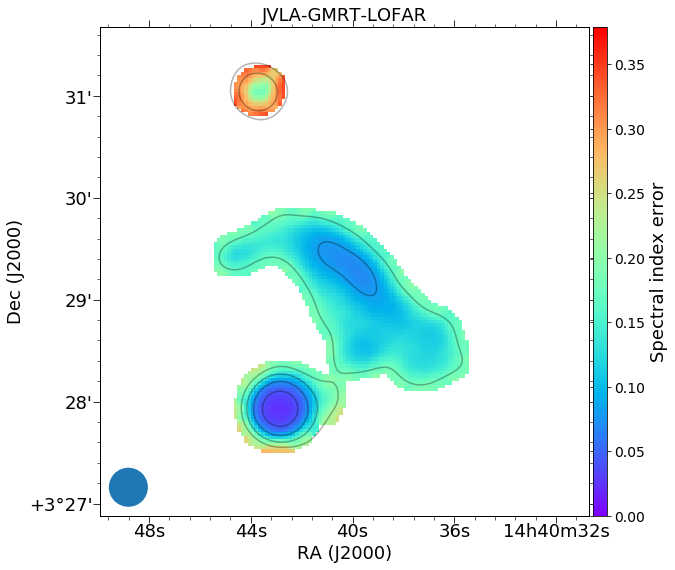

In [130]:
al_er = aplpy.FITSFigure('error_all.fits',slices=[0,0])
al_er.show_colorscale(vmin=0,cmap='rainbow', smooth=1)
al_er.set_title('JVLA-GMRT-LOFAR',size=18)
#al_er.show_contour('./FITS/new_LOFAR_MKW8_smooth_regrid.fits',colors='black', slices=[0,0],smooth=1, \
#                   levels=lev_jvla, alpha=0.3)
al_er.show_contour('./FITS/MKW8_uvtaper_0_weight_briggs_robust_0._smooth_regrid.image.fits',colors='black', \
                      slices=[0,0],smooth=1, levels=lev_jvla, alpha=0.3)
al_er.recenter(220.168,3.488, radius=0.04)
al_er.add_colorbar()
al_er.colorbar.set_axis_label_text('Spectral index error')
al_er.colorbar.set_axis_label_font( size=18)
al_er.colorbar.set_font(size=14)
al_er.add_beam()
al_er.ticks.set_color('black')
al_er.tick_labels.set_xformat('hh:mm:ss')
al_er.tick_labels.set_yformat('dd:mm')
al_er.axis_labels.set_font(size=18)
al_er.tick_labels.set_font(size=18)
al_er.save('error_spectral_index_all.png',dpi=144)

### lofar-gmrt

In [923]:
#lofar-gmrt
alpha,error=spectral_index_2_freq('GL',new_gmrt_im, new_lofar_im)
fits.writeto('alpha_lofar_gmrt.fits', alpha, gmrt[0].header, overwrite=True)
fits.writeto('error_lofar_gmrt.fits', error, gmrt[0].header, overwrite=True)

INFO: Setting slices=[0, 0] [aplpy.core]


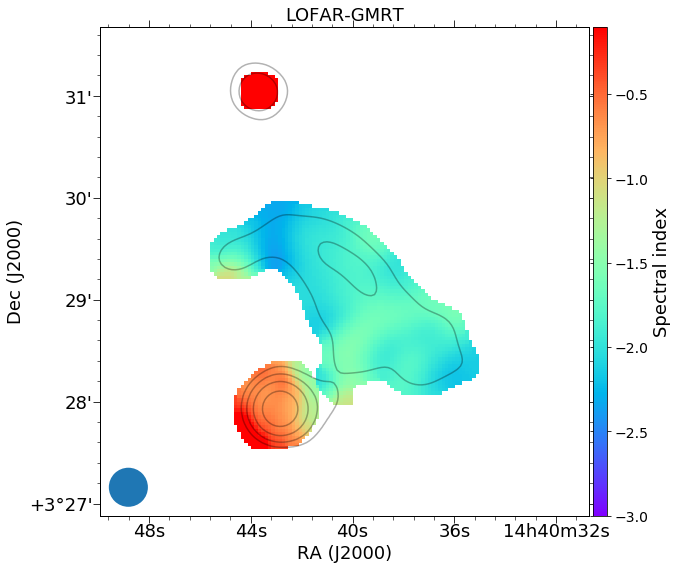

In [132]:
lof_gmrt = aplpy.FITSFigure('alpha_lofar_gmrt.fits',slices=[0,0])
lof_gmrt.set_title('LOFAR-GMRT', size=18)
#lof_gmrt.show_contour('./FITS/new_LOFAR_MKW8_smooth_regrid.fits',colors='black', slices=[0,0],smooth=1, levels=[5*x_lofar*10**6,10*x_lofar*10**6], alpha=0.3)
lof_gmrt.show_contour('./FITS/MKW8_uvtaper_0_weight_briggs_robust_0._smooth_regrid.image.fits',colors='black', \
                      slices=[0,0],smooth=1, levels=lev_jvla, alpha=0.3)
lof_gmrt.show_colorscale(vmin=-3,vmax=-0.1,stretch='linear',cmap='rainbow', smooth=1)
lof_gmrt.recenter(220.168,3.488, radius=0.04)
lof_gmrt.add_colorbar()
lof_gmrt.colorbar.set_axis_label_text('Spectral index')
lof_gmrt.colorbar.set_axis_label_font( size=18)
lof_gmrt.add_beam()
lof_gmrt.colorbar.set_font(size=14)
lof_gmrt.ticks.set_color('black')
lof_gmrt.tick_labels.set_xformat('hh:mm:ss')
lof_gmrt.tick_labels.set_yformat('dd:mm')
lof_gmrt.axis_labels.set_font(size=18)
lof_gmrt.tick_labels.set_font(size=18)
lof_gmrt.save('spectral_index_lof_gmrt.png',dpi=144)

INFO: Setting slices=[0, 0] [aplpy.core]
INFO: Auto-setting vmax to  4.470e-01 [aplpy.core]


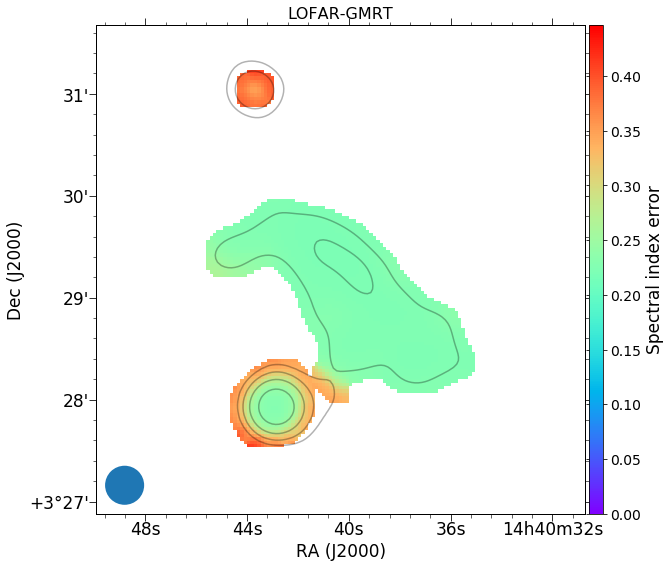

In [89]:
lof_gmrt_er = aplpy.FITSFigure('error_lofar_gmrt.fits',slices=[0,0])
lof_gmrt_er.set_title('LOFAR-GMRT', size=18)
#lof_gmrt_er.show_contour('./FITS/new_LOFAR_MKW8_smooth_regrid.fits',colors='black', slices=[0,0],smooth=1, levels=[5*x_lofar*10**6,10*x_lofar*10**6], alpha=0.3)
lof_gmrt_er.show_contour('./FITS/MKW8_uvtaper_0_weight_briggs_robust_0._smooth_regrid.image.fits',colors='black', \
                      slices=[0,0],smooth=1,levels=lev_jvla, alpha=0.3)
lof_gmrt_er.show_colorscale(vmin=0,stretch='linear',cmap='rainbow', smooth=1)
lof_gmrt_er.recenter(220.168,3.488, radius=0.04)
lof_gmrt_er.add_colorbar()
lof_gmrt_er.colorbar.set_axis_label_text('Spectral index error')
lof_gmrt_er.colorbar.set_axis_label_font(size=18)
lof_gmrt_er.add_beam()
lof_gmrt_er.colorbar.set_font(size=14)
lof_gmrt_er.ticks.set_color('black')
lof_gmrt_er.tick_labels.set_xformat('hh:mm:ss')
lof_gmrt_er.tick_labels.set_yformat('dd:mm')
lof_gmrt_er.axis_labels.set_font(size=18)
lof_gmrt_er.tick_labels.set_font(size=18)
lof_gmrt_er.save('error_spectral_index_lof_gmrt.png',dpi=144)

### lofar-jvla

In [925]:
#lofar-jvl
alpha,error=spectral_index_2_freq('JL',new_lofar_im, new_jvla_im)
fits.writeto('alpha_lofar_jvla.fits', alpha, gmrt[0].header, overwrite=True)
fits.writeto('error_lofar_jvla.fits', error, gmrt[0].header, overwrite=True)

INFO: Setting slices=[0, 0] [aplpy.core]


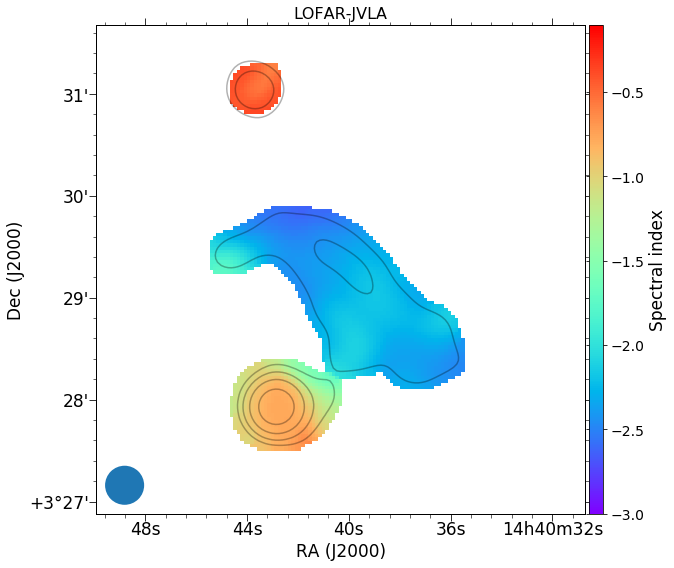

In [90]:
lof_jvla = aplpy.FITSFigure('alpha_lofar_jvla.fits',slices=[0,0])
lof_jvla.set_title('LOFAR-JVLA', size=18)
#lof_jvla.show_contour('./FITS/new_LOFAR_MKW8_smooth_regrid.fits',colors='black', slices=[0,0],smooth=1, levels=[5*x_lofar*10**6,10*x_lofar*10**6], alpha=0.3)
lof_jvla.show_contour('./FITS/MKW8_uvtaper_0_weight_briggs_robust_0._smooth_regrid.image.fits',colors='black', \
                      slices=[0,0],smooth=1, levels=lev_jvla, alpha=0.3)
lof_jvla.show_colorscale(vmin=-3,vmax=-0.1,stretch='linear',cmap='rainbow', smooth=1)
lof_jvla.recenter(220.168,3.488, radius=0.04)
lof_jvla.add_colorbar()
lof_jvla.colorbar.set_axis_label_text('Spectral index')
lof_jvla.colorbar.set_axis_label_font( size=18)
lof_jvla.add_beam()
lof_jvla.colorbar.set_font(size=14)
lof_jvla.ticks.set_color('black')
lof_jvla.tick_labels.set_xformat('hh:mm:ss')
lof_jvla.tick_labels.set_yformat('dd:mm')
lof_jvla.axis_labels.set_font(size=18)
lof_jvla.tick_labels.set_font(size=18)
lof_jvla.save('spectral_index_lof_jvla.png',dpi=144)

INFO: Setting slices=[0, 0] [aplpy.core]
INFO: Auto-setting vmax to  2.247e-01 [aplpy.core]


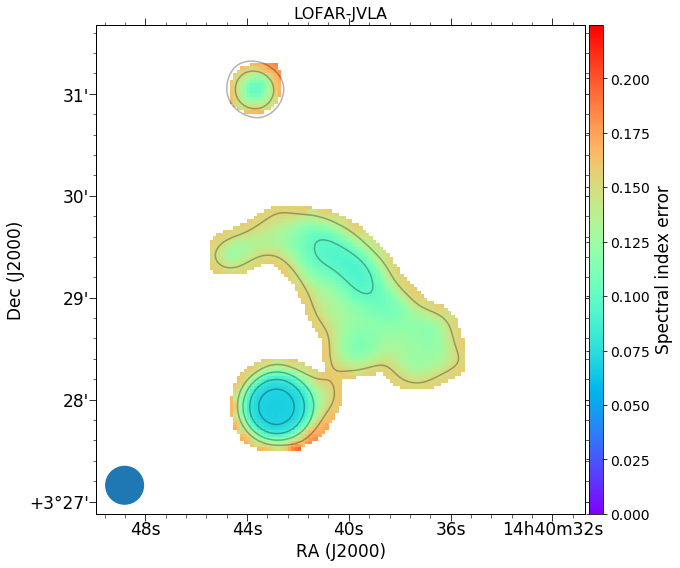

In [91]:
lof_jvla_er = aplpy.FITSFigure('error_lofar_jvla.fits',slices=[0,0])
lof_jvla_er.set_title('LOFAR-JVLA', size=18)
#lof_jvla_er.show_contour('./FITS/new_LOFAR_MKW8_smooth_regrid.fits',colors='black', slices=[0,0],smooth=1, levels=[5*x_lofar*10**6,10*x_lofar*10**6], alpha=0.3)
lof_jvla_er.show_contour('./FITS/MKW8_uvtaper_0_weight_briggs_robust_0._smooth_regrid.image.fits',colors='black', \
                      slices=[0,0],smooth=1, levels=lev_jvla, alpha=0.3)
lof_jvla_er.show_colorscale(vmin=0,stretch='linear',cmap='rainbow', smooth=1)
lof_jvla_er.recenter(220.168,3.488, radius=0.04)
lof_jvla_er.add_colorbar()
lof_jvla_er.colorbar.set_axis_label_text('Spectral index error')
lof_jvla_er.colorbar.set_axis_label_font( size=18)
lof_jvla_er.add_beam()
lof_jvla_er.colorbar.set_font(size=14)
lof_jvla_er.ticks.set_color('black')
lof_jvla_er.tick_labels.set_xformat('hh:mm:ss')
lof_jvla_er.tick_labels.set_yformat('dd:mm')
lof_jvla_er.axis_labels.set_font(size=18)
lof_jvla_er.tick_labels.set_font(size=18)
lof_jvla_er.save('error_spectral_index_lof_jvla.png',dpi=144)

### gmrt-jvla

In [928]:
alpha,error=spectral_index_2_freq('GJ',new_gmrt_im, new_jvla_im)
fits.writeto('alpha_gmrt_jvla.fits', alpha, gmrt[0].header, overwrite=True)
fits.writeto('error_gmrt_jvla.fits', error, gmrt[0].header, overwrite=True)

INFO: Setting slices=[0, 0] [aplpy.core]


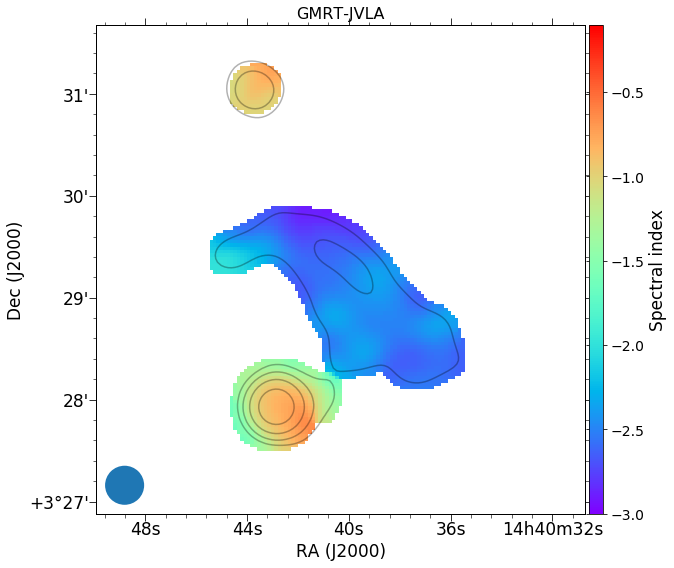

In [92]:
gmrt_jvla = aplpy.FITSFigure('alpha_gmrt_jvla.fits',slices=[0,0])
gmrt_jvla.set_title('GMRT-JVLA', size=18)
#gmrt_jvla.show_contour('./FITS/new_MKW8_GMRT_smooth_regrid.fits',colors='black', slices=[0,0],smooth=1, levels=[5*x_g*10**6,10*x_g*10**6], alpha=0.3)
gmrt_jvla.show_contour('./FITS/MKW8_uvtaper_0_weight_briggs_robust_0._smooth_regrid.image.fits',colors='black', \
                      slices=[0,0],smooth=1, levels=lev_jvla, alpha=0.3)
gmrt_jvla.show_colorscale(vmin=-3,vmax=-0.1,stretch='linear',cmap='rainbow', smooth=1)
gmrt_jvla.recenter(220.168,3.488,radius=0.04)
gmrt_jvla.add_colorbar()
gmrt_jvla.colorbar.set_axis_label_text('Spectral index')
gmrt_jvla.colorbar.set_axis_label_font( size=18)
gmrt_jvla.add_beam()
gmrt_jvla.colorbar.set_font(size=14)
gmrt_jvla.ticks.set_color('black')
gmrt_jvla.tick_labels.set_xformat('hh:mm:ss')
gmrt_jvla.tick_labels.set_yformat('dd:mm')
gmrt_jvla.axis_labels.set_font(size=18)
gmrt_jvla.tick_labels.set_font(size=18)
gmrt_jvla.save('spectral_index_gmrt_jvla.png',dpi=144)


INFO: Setting slices=[0, 0] [aplpy.core]
INFO: Auto-setting vmax to  3.164e-01 [aplpy.core]


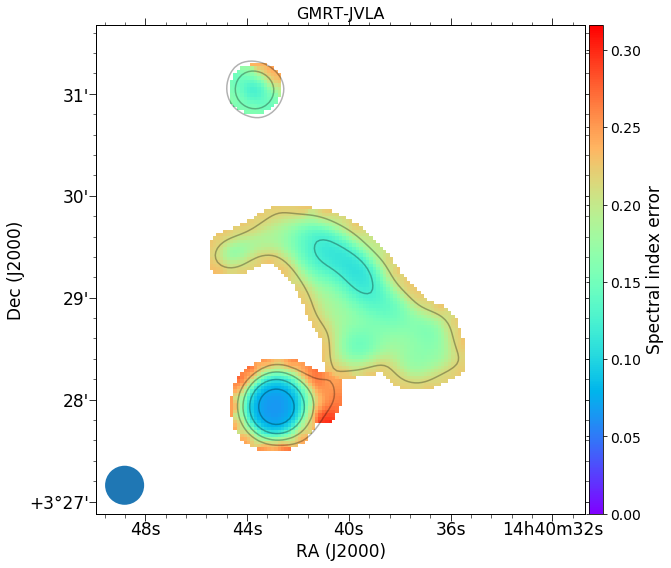

In [93]:
gmrt_jvla_er = aplpy.FITSFigure('error_gmrt_jvla.fits',slices=[0,0])
gmrt_jvla_er.set_title('GMRT-JVLA', size=18)
#gmrt_jvla_er.show_contour('./FITS/new_MKW8_GMRT_smooth_regrid.fits',colors='black', slices=[0,0],smooth=1, levels=[5*x_g*10**6,10*x_g*10**6], alpha=0.3)
gmrt_jvla_er.show_contour('./FITS/MKW8_uvtaper_0_weight_briggs_robust_0._smooth_regrid.image.fits',colors='black', \
                      slices=[0,0],smooth=1, levels=lev_jvla, alpha=0.3)
gmrt_jvla_er.show_colorscale(vmin=0,stretch='linear',cmap='rainbow', smooth=1)
gmrt_jvla_er.recenter(220.168,3.488,radius=0.04)
gmrt_jvla_er.add_colorbar()
gmrt_jvla_er.colorbar.set_axis_label_text('Spectral index error')
gmrt_jvla_er.colorbar.set_axis_label_font(size=18)
gmrt_jvla_er.add_beam()
gmrt_jvla_er.colorbar.set_font(size=14)
gmrt_jvla_er.ticks.set_color('black')
gmrt_jvla_er.tick_labels.set_xformat('hh:mm:ss')
gmrt_jvla_er.tick_labels.set_yformat('dd:mm')
gmrt_jvla_er.axis_labels.set_font(size=18)
gmrt_jvla_er.tick_labels.set_font(size=18)
gmrt_jvla_er.save('error_spectral_index_gmrt_jvla.png',dpi=144)

In [ ]:
def spectral_index(new_gmrt_im,new_jvla_im,new_lofar_im, v_gmrt, v_jvla, v_lofar):
    
    f_gmrt=0.08
    f_jvla=0.03
    f_lofar=0.15
    
    #data
    rms_jvla=5.75e-5
    rms_gmrt=4e-4
    rms_lofar=3.555e-4

    alpha=np.empty((r*2,r*2))
    error=np.empty((r*2,r*2))
    alpha[:] = np.nan
    error[:] = np.nan
    
   
    
    new_jvla_im[new_jvla_im<=0] = np.nan
    new_gmrt_im[new_gmrt_im<=0] = np.nan
    new_lofar_im[new_lofar_im<=0] = np.nan

    for j in range(len(new_jvla_im)):
        for i in range(len(new_jvla_im)):  

            if np.isnan(new_gmrt_im[j][i])==True and new_jvla_im[j][i]>0. and new_lofar_im[j][i]>0.:
                #print('A')

                S_jvla[j][i]=check_sigma(new_jvla_im[j][i],rms_jvla,3)
                S_lofar[j][i]=check_sigma(new_lofar_im[j][i],rms_lofar,3)

                if S_jvla[j][i]>0. and S_lofar[j][i]>0.:

                    alpha[j][i]=analytical_fit(v_jvla,v_lofar,S_jvla[j][i],S_lofar[j][i])
                    error[j][i]=error_analytical(S_jvla[j][i], S_lofar[j][i], rms_jvla,rms_lofar,\
                                           v_jvla, v_lofar, f_jvla, f_lofar)

            elif np.isnan(new_jvla_im[j][i])==True and new_gmrt_im[j][i]>0. and new_lofar_im[j][i]>0.:
                #print('B')
                S_gmrt[j][i]=check_sigma(new_gmrt_im[j][i],rms_gmrt,5)
                S_lofar[j][i]=check_sigma(new_lofar_im[j][i],rms_lofar,5)

                if S_gmrt[j][i]>0. and S_lofar[j][i]>0.:

                    alpha[j][i]=analytical_fit(v_lofar, v_gmrt, S_lofar[j][i],S_gmrt[j][i])
                    error[j][i]=error_analytical(S_lofar[j][i], S_gmrt[j][i], rms_lofar,rms_gmrt, v_lofar, v_gmrt, f_lofar, f_gmrt)

            elif np.isnan(new_lofar_im[j][i])==True and new_gmrt_im[j][i]>0. and new_jvla_im[j][i]>0.:

                #print('C')
                S_jvla[j][i]=check_sigma(new_jvla_im[j][i],rms_jvla,3)
                S_gmrt[j][i]=check_sigma(new_gmrt_im[j][i],rms_gmrt,3)

                if np.isnan(S_jvla[j][i])== False and np.isnan(S_gmrt[j][i])== False:
                    alpha[j][i]=analytical_fit(v_gmrt, v_jvla, S_gmrt[j][i], S_jvla[j][i])
                    error[j][i]=error_analytical(S_gmrt[j][i], S_jvla[j][i], rms_gmrt, rms_jvla, v_gmrt, v_jvla, f_gmrt, f_jvla)
    
        
            elif new_jvla_im[j][i]>0. and new_gmrt_im[j][i]>0. and new_lofar_im[j][i]>0.:

                S_jvla[j][i]=check_sigma(new_jvla_im[j][i],rms_jvla,3)
                S_gmrt[j][i]=check_sigma(new_gmrt_im[j][i],rms_gmrt,3)
                S_lofar[j][i]=check_sigma(new_lofar_im[j][i],rms_lofar,3)


                if np.isnan(S_jvla[j][i])== False and np.isnan(S_gmrt[j][i])== False and np.isnan(S_lofar[j][i])== False:
                    alpha[j][i]=linear_fit(v_gmrt, v_jvla, v_lofar, S_gmrt[j][i], S_jvla[j][i], S_lofar[j][i])
                    error[j][i]=MC_error(S_gmrt[j][i], S_jvla[j][i], S_lofar[j][i])
                    
    return alpha,error


In [ ]:
S=[S_total_jvla,S_total_gmrt,S_total_lofar]
v=[v_jvla,v_gmrt,v_lofar]
error=[delta_s_jvla_integrated,delta_s_gmrt_integrated,delta_s_lofar_integrated]

a = np.asarray(S, dtype=float)
b = np.asarray(v, dtype=float)
e = np.asarray(error, dtype=float)

logA = np.log10(a)
logB = np.log10(b)
loge = np.log10(e)

z = np.polyfit(logB,logA, deg=1)
f = np.poly1d(z)


# calculate new x's and y's
x_new = np.linspace(2.1,3.2,10)
y_new = f(x_new)

plt.errorbar(v, S, yerr=error, fmt='--o', ecolor='b', alpha=0.7, label='Measurement from MKW8')

plt.plot(10**x_new,10**y_new, color='black',alpha=0.5, label='linear fit')
plt.yscale('log')
plt.xscale('log')
plt.xlabel('Frequency (MHz)',fontsize=13,alpha=0.8  )
plt.ylabel('Flux (Jy)', fontsize=13,alpha=0.8)
plt.xlim(10**2.1,10**3.2)
plt.legend(loc='upper right')
plt.show()


[-2.4005977   5.29275869] 0.17170790130301358


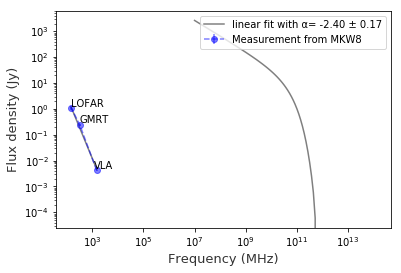

In [468]:
S=[S_total_jvla,S_total_gmrt,S_total_lofar]
v=[v_jvla,v_gmrt,v_lofar]
error=[delta_s_jvla_integrated,delta_s_gmrt_integrated,delta_s_lofar_integrated]


S = np.asarray(S, dtype=float)
v = np.asarray(v, dtype=float)
e = np.asarray(error, dtype=float)

x = np.log10(v)
y = np.log10(S)
loge = S/(e*np.log(10.))

coeff,yaj,fin_err=lin_curve_fit(x,y,loge)

print(coeff,fin_err)
words=['LOFAR','GMRT','VLA'] 

plt.errorbar(v, S, yerr=error, fmt='--o',color='b', ecolor='b', alpha=0.5, label='Measurement from MKW8')
plt.plot(10**x,10**yaj,color='k',alpha=0.5, label='linear fit with \u03B1= %.2f \u00B1 %.2f' %(coeff[0], fin_err))
#plt.plot(jp[0]-10**7,jp[1]-10**3, color='k',alpha=0.5)
plt.plot(jp[0],jp[1], color='k',alpha=0.5)
plt.text(10**x[0]-350,10**yaj[0],'VLA')
plt.text(10**x[1],10**yaj[1]+0.1,'GMRT')
plt.text(10**x[-1],10**yaj[-1]+0.07,'LOFAR')
plt.yscale('log')
plt.xscale('log')
plt.xlabel('Frequency (MHz)',fontsize=13,alpha=0.8  )
plt.ylabel('Flux density (Jy)', fontsize=13,alpha=0.8)
#plt.stem(v,S, '--b')
#plt.xlim(10**2.1,10**3.2)
plt.legend(loc='upper right')
plt.savefig('fit.png')
#plt.set_xticklabels('1500')
plt.show()